In [163]:
import os
os.environ["MONGODB_ENDPOINT"] = "mongodb://pf.uni.lux:27017"

In [164]:
from mevlib.utils.utils import connect_to_mongodb
from pymongo import ASCENDING, DESCENDING

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

db = connect_to_mongodb()

MIN_BLOCK_HEIGHT_ANALYZED = 13720000
MAX_BLOCK_HEIGHT_ANALYZED = 13910000

from web3 import Web3

w3 = Web3(Web3.HTTPProvider("http://pf.uni.lux:8547"))
if w3.isConnected():
    print("Connected worker to "+w3.clientVersion)
else:
    print("Error: Could not connect to Ethereum client.")

Connected worker to Geth/v1.10.16-stable-20356e57/linux-amd64/go1.17.5


In [165]:
from datetime import datetime

MIN_BLOCK_TIMESTAMP = w3.eth.getBlock(MIN_BLOCK_HEIGHT_ANALYZED).timestamp * 1000000
MAX_BLOCK_TIMESTAMP = w3.eth.getBlock(MAX_BLOCK_HEIGHT_ANALYZED).timestamp * 1000000

print(datetime.utcfromtimestamp(MIN_BLOCK_TIMESTAMP / 1000000).strftime('%Y-%m-%d'))
print(datetime.utcfromtimestamp(MAX_BLOCK_TIMESTAMP / 1000000).strftime('%Y-%m-%d'))

2021-12-01
2021-12-31


In [167]:
private_blocks = db.flashbots.private_blocks
results_count = private_blocks.count_documents({})
print("Total private blocks:", results_count)

min_private_block = private_blocks.find_one(sort=[("number", ASCENDING)])
print("Min private block:", min_private_block["number"])
max_private_block = private_blocks.find_one(sort=[("number", DESCENDING)])
print("Max private block:", max_private_block["number"])

min_private_timestamp = w3.eth.getBlock(min_private_block["number"]).timestamp * 1000000
print(datetime.utcfromtimestamp(min_private_timestamp / 1000000).strftime('%Y-%m-%d'))
max_private_block = w3.eth.getBlock(max_private_block["number"]).timestamp * 1000000
print(datetime.utcfromtimestamp(max_private_block / 1000000).strftime('%Y-%m-%d'))

Total private blocks: 151053
Min private block: 13720000
Max private block: 13910000
2021-12-01
2021-12-31


In [169]:
observed_transactions = db.flashbots.observed_transactions
print("Number of observerd public transactions:", observed_transactions.count_documents({}))

Number of observerd public transactions: 125661539


In [156]:
observed_transactions_per_day = dict()
observed_transactions_per_hour = dict()
cursor = observed_transactions.find({})
for document in cursor:
    day = datetime.utcfromtimestamp(document["timestamp"] / 1000000).strftime('%Y/%m/%d')
    if not day in observed_transactions_per_day:
        observed_transactions_per_day[day] = 0
    observed_transactions_per_day[day] += 1
    
    hour = datetime.utcfromtimestamp(document["timestamp"] / 1000000).strftime('%Y/%m/%d %H')
    if not hour in observed_transactions_per_hour:
        observed_transactions_per_hour[hour] = 0
    observed_transactions_per_hour[hour] += 1


AutoReconnect: pf.uni.lux:27017: [Errno 104] Connection reset by peer

In [154]:
# November
for i in range(0, 30):
    date = "2021/11/"+str(i+1)
    if i+1 < 10:
        date = "2021/11/0"+str(i+1)
    if date in observed_transactions_per_day:
        print(date, observed_transactions_per_day[date])
    else:
        print(date, "missing data")
print("")

# December
for i in range(0, 31):
    date = "2021/12/"+str(i+1)
    if i+1 < 10:
        date = "2021/12/0"+str(i+1)
    if date in observed_transactions_per_day:
        print(date, observed_transactions_per_day[date])
    else:
        print(date, "missing data")
print("")

# January
for i in range(0, 31):
    date = "2022/01/"+str(i+1)
    if i+1 < 10:
        date = "2022/01/0"+str(i+1)
    if date in observed_transactions_per_day:
        print(date, observed_transactions_per_day[date])
    else:
        print(date, "missing data")
print("")
        
# February
for i in range(0, 28):
    date = "2022/02/"+str(i+1)
    if i+1 < 10:
        date = "2022/02/0"+str(i+1)
    if date in observed_transactions_per_day:
        print(date, observed_transactions_per_day[date])
    else:
        print(date, "missing data")
print("")

# March
for i in range(0, 31):
    date = "2022/03/"+str(i+1)
    if i+1 < 10:
        date = "2022/03/0"+str(i+1)
    if date in observed_transactions_per_day:
        print(date, observed_transactions_per_day[date])
    else:
        print(date, "missing data")
print("")

# April
for i in range(0, 30):
    date = "2022/04/"+str(i+1)
    if i+1 < 10:
        date = "2022/04/0"+str(i+1)
    if date in observed_transactions_per_day:
        print(date, observed_transactions_per_day[date])
    else:
        print(date, "missing data")

2021/11/01 missing data
2021/11/02 missing data
2021/11/03 missing data
2021/11/04 missing data
2021/11/05 missing data
2021/11/06 missing data
2021/11/07 missing data
2021/11/08 263106
2021/11/09 712233
2021/11/10 724475
2021/11/11 723882
2021/11/12 808715
2021/11/13 806788
2021/11/14 723120
2021/11/15 736499
2021/11/16 727768
2021/11/17 697502
2021/11/18 707271
2021/11/19 703494
2021/11/20 712161
2021/11/21 716693
2021/11/22 740707
2021/11/23 728043
2021/11/24 766187
2021/11/25 705509
2021/11/26 815067
2021/11/27 738204
2021/11/28 796576
2021/11/29 681750
2021/11/30 701732

2021/12/01 940980
2021/12/02 1352298
2021/12/03 1348632
2021/12/04 1453443
2021/12/05 1368669
2021/12/06 1405063
2021/12/07 1374476
2021/12/08 1340594
2021/12/09 1471605
2021/12/10 1431238
2021/12/11 1367070
2021/12/12 1338051
2021/12/13 1329663
2021/12/14 1406328
2021/12/15 1362528
2021/12/16 1294986
2021/12/17 1292138
2021/12/18 1256574
2021/12/19 1292406
2021/12/20 1348049
2021/12/21 1398099
2021/12/22 863780
2

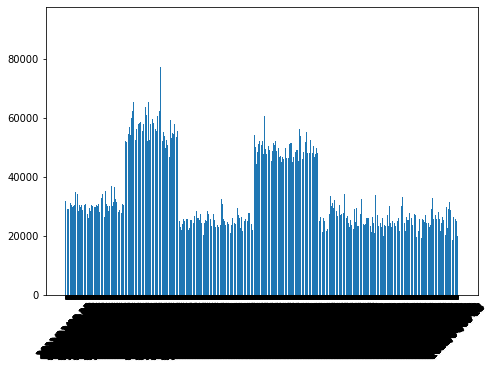

In [139]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks(rotation = 45)
ax.bar(observed_transactions_per_day.keys(),observed_transactions_per_day.values())
plt.show()

In [ ]:
sequences = list()
limit = None
last_one = None
private_transactions = db.flashbots.private_transactions
for block_number in range(MIN_BLOCK_HEIGHT_ANALYZED, MAX_BLOCK_HEIGHT_ANALYZED+1):
    print(block_number)
    block = w3.eth.getBlock(block_number, False)
    document = private_transactions.find_one({"number":block_number})
    if document and len(block["transactions"]) == len(document["privateTransactions"]):
        sequences.append(1)
        last_one = block_number
    else:
        sequences.append(0)
        if limit == None and block_number - last_one == 10:
            limit = last_one
            break
print(sequences)
print(limit)

In [112]:
private_transactions = db.flashbots.private_transactions
#cursor = private_transactions.find({"number":13745076})
#cursor = private_transactions.find({"number":13750619})
cursor = private_transactions.find()
total = 0
valid_private_blocks = list()
same_receiver = dict()
import pprint                    
for document in cursor:
    # Search for blocks that include only private transactions that are not related to flashbots
    private = True
    for private_transaction in document["privateTransactions"]:
        if private_transaction["flashbots_transaction"] == True:
            private = False
    if private:
        # Search for blocks where only max 20% of the transactions are private
        if "nrOfTransactions" in document and document["nrOfPrivateTransactions"] / document["nrOfTransactions"] * 100 <= 50:
            total += 1
            senders = dict()
            receivers = dict()
            private_insertion_frontrunning_attacks = list()
            for i in range(len(document["privateTransactions"])):
                # Search for private insertion frontrunning that is not flashbots
                if i+1 < len(document["privateTransactions"]):
                    if document["privateTransactions"][i]["transactionIndex"] + 2 == document["privateTransactions"][i+1]["transactionIndex"] and document["privateTransactions"][i]["to"] == document["privateTransactions"][i+1]["to"] and document["privateTransactions"][i]["input"] != document["privateTransactions"][i+1]["input"]:
                        if document["number"] not in private_insertion_frontrunning:
                            private_insertion_frontrunning_attacks.append(document["privateTransactions"][i])
                            private_insertion_frontrunning_attacks.append(document["privateTransactions"][i+1])
                # Search for private transactions that share the same sender
                if not document["privateTransactions"][i]["from"] in senders:
                    senders[document["privateTransactions"][i]["from"]] = list()
                    senders[document["privateTransactions"][i]["from"]].append(document["privateTransactions"][i])
                else:
                    if senders[document["privateTransactions"][i]["from"]][-1]["transactionIndex"] + 1 == document["privateTransactions"][i]["transactionIndex"] or senders[document["privateTransactions"][i]["from"]][-1]["gas"] == document["privateTransactions"][i]["gas"] and senders[document["privateTransactions"][i]["from"]][-1]["gasPrice"] == document["privateTransactions"][i]["gasPrice"]:
                        senders[document["privateTransactions"][i]["from"]].append(document["privateTransactions"][i])
                # Search for private transactions that share the same receiver
                if not document["privateTransactions"][i]["to"] in receivers:
                    receivers[document["privateTransactions"][i]["to"]] = list()
                    receivers[document["privateTransactions"][i]["to"]].append(document["privateTransactions"][i])
                else:
                    if receivers[document["privateTransactions"][i]["to"]][-1]["transactionIndex"] + 1 == document["privateTransactions"][i]["transactionIndex"]:
                        receivers[document["privateTransactions"][i]["to"]].append(document["privateTransactions"][i])
            # Check if block is truly private
            valid_private_transactions = 0
            #print(private_insertion_frontrunning_attacks)
            #print()
            for sender in senders:
                #print(sender, senders[sender])
                if len(senders[sender]) > 10:
                    valid_private_transactions += len(senders[sender])
            valid_private_transactions += len(private_insertion_frontrunning_attacks)
            if valid_private_transactions == len(document["privateTransactions"]):
                valid_private_blocks.append(document["number"])
                
            for receiver in receivers:
                if len(receivers[receiver]) == document["nrOfPrivateTransactions"] and document["nrOfPrivateTransactions"] > 2:
                    if not receiver in same_receiver:
                        same_receiver[receiver] = list()
                    same_receiver[receiver].append(document["number"])
                    #print(document["number"])
                    #print(document["nrOfPrivateTransactions"])
                    #print(document["nrOfTransactions"])
                    #print(len(receivers))
                    #pprint.pprint(receiver)
                    #pprint.pprint(receivers[receiver])

                    
print(len(same_receiver))
pprint.pprint(same_receiver)
print(total)
print("valid_private_blocks:", valid_private_blocks)
#print(len(private_insertion_frontrunning))
#print(13745076 in private_insertion_frontrunning)
#print(sorted(private_insertion_frontrunning))
#from scipy import stats
#print(stats.mode(private_insertion_frontrunning))



27
{'0x0000006daea1723962647b7e189d311d757Fb793': [13760845,
                                                13738204,
                                                13788921,
                                                13799964,
                                                13799668,
                                                13776422,
                                                13810338],
 '0x0b95993A39A363d99280Ac950f5E4536Ab5C5566': [13758135],
 '0x28d3F1aF914F95b8cF80a307b77e345810e12980': [13762402],
 '0x3788539703c1e469fE0EB408095E97B0C247042a': [13775553],
 '0x3FDA25F27211a138ADF211F4C060f2149674Be6D': [13753915, 13811884, 13798489],
 '0x5f65f7b609678448494De4C87521CdF6cEf1e932': [13755152, 13780657],
 '0x60cd862c9C687A9dE49aecdC3A99b74A4fc54aB6': [13743682],
 '0x70526cc7a6d6320B44122ea9d2d07670ACcC85A1': [13737494, 13782189, 13795019],
 '0x722122dF12D4e14e13Ac3b6895a86e84145b6967': [13767855],
 '0x7898593Ee9adD0d55dBa5F5b4690b47c3BDC7aCC': [13742691],
 '0x7Be80

In [21]:
limit = 13721528
c = 0
private_transactions = db.flashbots.private_transactions
#for block_number in range(MIN_BLOCK_HEIGHT_ANALYZED, MAX_BLOCK_HEIGHT_ANALYZED+1):
#    document = private_transactions.find_one({"number": block_number})
cursor = private_transactions.find({})
for document in cursor:
    print(document["number"])
    print(document["nrOfPrivateTransactions"])
    print(document["nrOfTransactions"])
    if c == 10:
        break
    c += 1
print(c)
     

13738275
1
36
13744225
3
28
13764200
2
26
13761650
1
12
13742951
6
63
13733175
3
118
13720425
89
89
13739550
4
87
13750175
7
58
13749325
3
70
13733600
1
83
10


In [ ]:
import bisect 
private_transactions = db.flashbots.private_transactions
cursor = private_transactions.find()
private_txs_per_block = list()
blocks_only_with_private_txs = list()
for document in cursor:
    block = w3.eth.getBlock(document["number"], False)
    if len(block["transactions"]) == len(document["privateTransactions"]):
        bisect.insort(blocks_only_with_private_txs, document["number"]) 
    else:
        private_txs_per_block.append(len(document["privateTransactions"]))

In [38]:
private_transactions = db.flashbots.private_transactions
cursor = private_transactions.find()
for document in cursor:
    if "nrOfTransactions" in document:
        continue
    print(document["number"])
    block = w3.eth.getBlock(document["number"], True)
    transactions = list()
    for tx in block["transactions"]:
        transaction = dict(tx)
        del transaction["blockHash"]
        del transaction["blockNumber"]
        del transaction["v"]
        del transaction["r"]
        del transaction["s"]
        if "accessList" in transaction:
            del transaction["accessList"]
        if "chainId" in transaction:
            del transaction["chainId"]
        if "maxFeePerGas" in transaction:
            transaction["maxFeePerGas"] = str(transaction["maxFeePerGas"])
        if "maxPriorityFeePerGas" in transaction:
            transaction["maxPriorityFeePerGas"] = str(transaction["maxPriorityFeePerGas"])
        if "type" in transaction:
            transaction["type"] = int(transaction["type"], 16)
        transaction["gasPrice"] = str(transaction["gasPrice"])
        transaction["value"] = str(transaction["value"])
        transaction["hash"] = transaction["hash"].hex()
        transactions.append(transaction)
    private_transactions.update_one({"number": document["number"]}, {"$set": {"nrOfPrivateTransactions": len(document["privateTransactions"])}})
    private_transactions.update_one({"number": document["number"]}, {"$set": {"nrOfTransactions": len(transactions)}})
    private_transactions.update_one({"number": document["number"]}, {"$set": {"transactions": transactions}})

13738555


ConnectionClosedError: code = 1006 (connection closed abnormally [internal]), no reason

Blocks containing at least one flashbots transaction: 101882 out of 190000 53.62210526315789


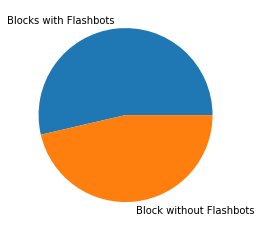

In [18]:
results_count = private_transactions.count_documents({"privateTransactions.flashbots_transaction": True})
total = MAX_BLOCK_HEIGHT_ANALYZED-MIN_BLOCK_HEIGHT_ANALYZED
print("Blocks containing at least one flashbots transaction:", results_count, "out of", total, results_count / total * 100.0)
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie([results_count, total-results_count], labels = ["Blocks with Flashbots", "Block without Flashbots"])
plt.show()

Blocks containing private transactions: 149548 out of 190000 78.70947368421054


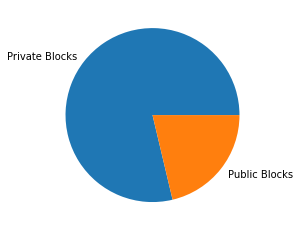

In [17]:
results_count = private_transactions.count_documents({"number": {"$gt": limit}})
print("Blocks containing private transactions:", results_count, "out of", MAX_BLOCK_HEIGHT_ANALYZED-MIN_BLOCK_HEIGHT_ANALYZED, results_count / (MAX_BLOCK_HEIGHT_ANALYZED-MIN_BLOCK_HEIGHT_ANALYZED) * 100.0)
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie([results_count, MAX_BLOCK_HEIGHT_ANALYZED-MIN_BLOCK_HEIGHT_ANALYZED-results_count], labels = ["Private Blocks", "Public Blocks"])
plt.show()

In [ ]:
flashbots_transactions = private_transactions.count_documents({"privateTransactions.flashbots_transaction": True})
print("Blocks that contain at least one private flashbots transaction", flashbots_transactions)

non_flashbots_transactions = private_transactions.count_documents({"privateTransactions.flashbots_transaction": False})
print("Blocks that contain at least one private transaction that is not part of a flashbots bundle", non_flashbots_transactions)


{'flashbots': 32558, 'mix': 69324}


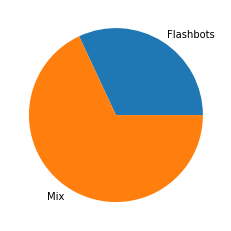

101882
pure flashbots number of transactions
32558
min 1
max 110
mean 3.657872105166165
median 3.0
(110, 13763954)
(1, 13738275)
[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [30]:
cursor = private_transactions.find({"privateTransactions.flashbots_transaction": True})
count = dict()
count["flashbots"] = 0
count["mix"] = 0
for document in cursor:
    flashbots, private = False, False
    for private_transaction in document["privateTransactions"]:
        if private_transaction["flashbots_transaction"] == True:
            flashbots = True
        elif private_transaction["flashbots_transaction"] == False:
            private = True
    if flashbots == True and private == True:
        count["mix"] += 1
    elif flashbots == True and private == False:
        count["flashbots"] += 1
print(count)
fig = plt.figure()
fig.patch.set_facecolor('white')
plt.pie([count["flashbots"], count["mix"]], labels = ["Pure Flashbots", "Flashbots Mixed"])
plt.show()
print(count["mix"]+count["flashbots"])

cursor = private_transactions.find({"privateTransactions.flashbots_transaction": True})
count_flashbots = list()
max_flashbots = None, None
min_flashbots = None, None
for document in cursor:
    flashbots, private = False, False
    for private_transaction in document["privateTransactions"]:
        if private_transaction["flashbots_transaction"] == True:
            flashbots = True
        elif private_transaction["flashbots_transaction"] == False:
            private = True
    if flashbots == True and private == True:
        continue
    elif flashbots == True and private == False:
        if max_flashbots[0] == None or max_flashbots[0] < len(document["privateTransactions"]):
            max_flashbots = len(document["privateTransactions"]), document["number"]
        if min_flashbots[0] == None or min_flashbots[0] > len(document["privateTransactions"]):
            min_flashbots = len(document["privateTransactions"]), document["number"]
        count_flashbots.append(len(document["privateTransactions"]))
print("pure flashbots number of transactions")
import numpy as np
print(len(count_flashbots))
print("min", np.min(count_flashbots))
print("max", np.max(count_flashbots))
print("mean", np.mean(count_flashbots))
print("median", np.median(count_flashbots))
print(max_flashbots)
print(min_flashbots)
print(sorted(count_flashbots))

In [ ]:
import operator

from difflib import SequenceMatcher

def findstem(arr):
 
    # Determine size of the array
    n = len(arr)
 
    # Take first word from array
    # as reference
    s = arr[0]
    l = len(s)
 
    res = ""
 
    for i in range(l):
        for j in range(i + 1, l + 1):
            
            # generating all possible substrings
            # of our reference string arr[0] i.e s
            stem = s[i:j]
            k = 1
            for k in range(1, n):
 
                # Check if the generated stem is
                # common to all words
                if stem not in arr[k]:
                    break
 
            # If current substring is present in
            # all strings and its length is greater
            # than current result
            if (k + 1 == n and len(res) < len(stem)):
                res = stem
 
    return res

cursor = private_transactions.find()
miner_addresses = dict()
miner_labels = dict()
c = 0
for document in cursor:
    if not document["miner"] in miner_addresses:
        miner_addresses[document["miner"]] = 0
    miner_addresses[document["miner"]] += 1
    
    if not document["miner"] in miner_labels:
        miner_labels[document["miner"]] = set()
    miner_labels[document["miner"]].add(document["extraDataDecoded"])
    
    if c == 2000:
        break
    c += 1
assert(len(miner_addresses) == len(miner_labels))
print(len(miner_addresses))
miner_addresses = dict(sorted(miner_addresses.items(), key=lambda item: item[1], reverse=True))
for k in miner_addresses:
    print(miner_addresses[k], "'"+k+"'", findstem(list(miner_labels[k])))
